In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA , KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### Première partie d'analyse exploratoire de données

In [39]:
data = pd.read_csv("Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [25]:
data["Milk"].value_counts().sort_values(ascending = False)

899      2
1610     2
3880     2
5139     2
3587     2
        ..
27472    1
7152     1
54259    1
2037     1
1020     1
Name: Milk, Length: 421, dtype: int64

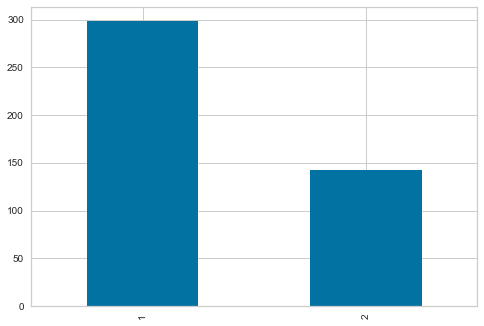

In [26]:
# Valeurs de la colonne "Channel"

data.Channel.value_counts().plot(kind = "bar");

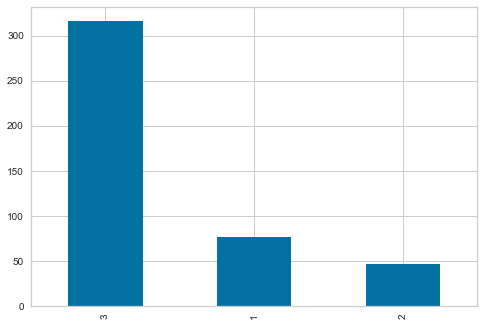

In [27]:
# Valeurs de la colonne "Region"

data.Region.value_counts().plot(kind = "bar");

In [40]:
# Renommage de colonne

data = data.rename(columns = {"Delicassen":"Delicatessen"})

data["Channel"] = data["Channel"].map({1:"HoReCa" , 2:"Retail"})
data["Region"] = data["Region"].map({1:"Lisbon" , 2:"Porto" , 3:"Other"})

In [7]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [29]:
# Table de fréquence de la colonne "Region" normalisée

data["Region"].value_counts(normalize = True) # L'argument normalize permet de passer à des pourcentages sur la colonne

Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: Region, dtype: float64

In [41]:
# Stockage des noms de colonnes dans une liste 

features = list(data.columns)

### Deuxième partie d'analyse exploratoire de données

In [31]:
# Résumé statistique des colonnes contenant les variables numériques

data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [42]:
# Sauvegarde de df au format .csv pour conserver une version nettoyée du tableau de données

data.to_csv(r"C:\Users\egakosso\Downloads\ALTERYX X POWER BI\Clustering\Segmentation de la clientère avec KMeans et ACP\Cleaned_file.csv" , sep = "|" , index = False)

In [43]:
# Importation du fichier sauvegardé

cleaned_data = pd.read_csv("Cleaned_file.csv" , sep = "|")
cleaned_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [34]:
# Structure du tableau de données

cleaned_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [35]:
# Valeurs nulles

cleaned_data.isna().sum() 

# Aucune valeur manquante dans nos colonnes

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

### Visualisation des données

C:\Users\egakosso\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


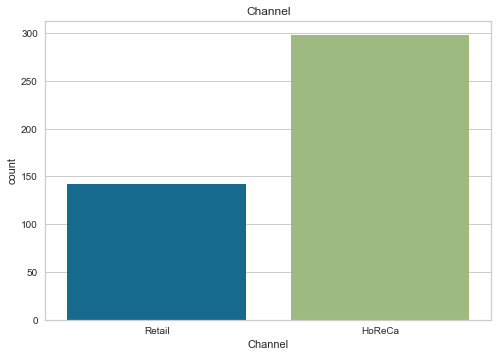

C:\Users\egakosso\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


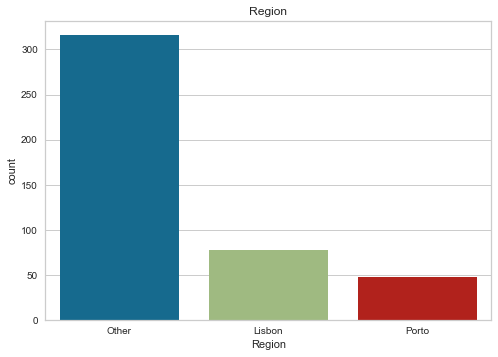

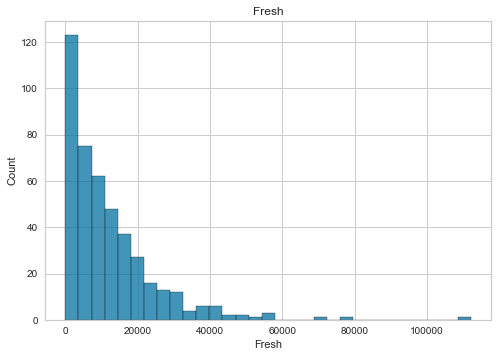

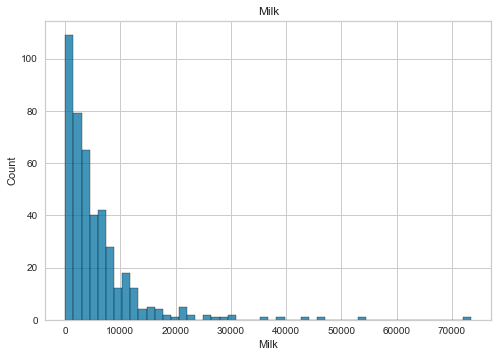

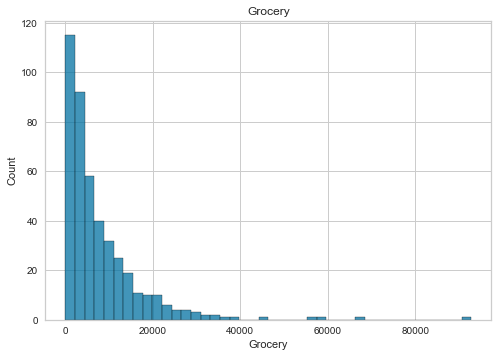

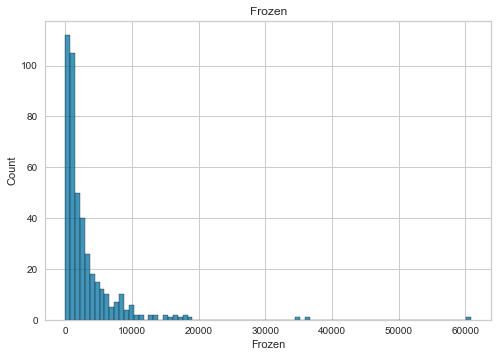

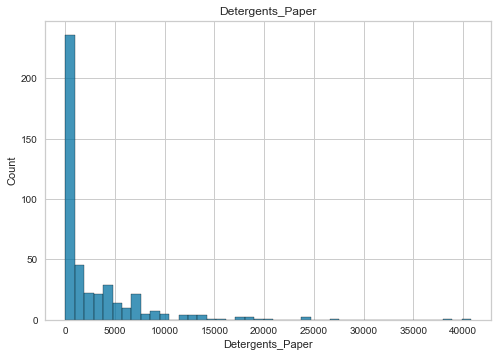

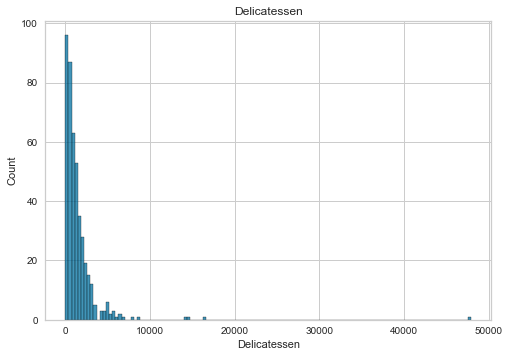

In [36]:
# Diagrammes à barres et histogrammes

for feature in features :
    
    if feature in ("Channel","Region") :
        
        sns.countplot(cleaned_data[feature]).set_title(feature);
        plt.show();
    
    else :
        
        sns.histplot(cleaned_data[feature]).set_title(feature);
        plt.show();

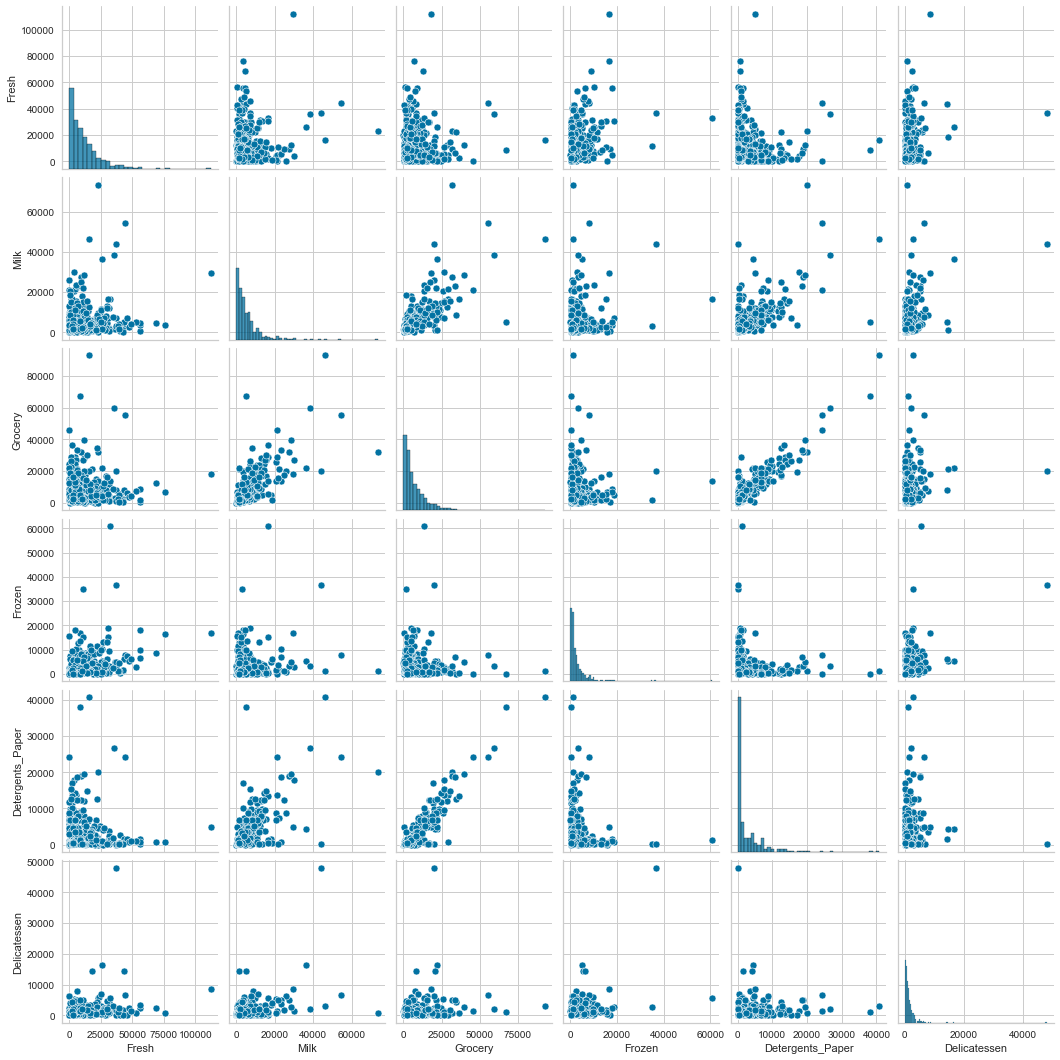

In [16]:
# Matrice de visualisation

sns.pairplot(cleaned_data);

### Analyse en composantes principales

### ACP Linéaire

In [44]:
# Dataframe des variables numériques ( Suppression des colonnes de variables catégorielles)

data_test_acp = data.drop(["Channel","Region"] , axis = 1)

In [47]:
# Standardisation des données

scaler = StandardScaler()

normalized_data = scaler.fit_transform(data_test_acp)

type(normalized_data)

numpy.ndarray

In [49]:
# Sauvegarde du tableau numpy

np.save("training_data.npy" , normalized_data)

In [50]:
# Application de l'ACP

pca = PCA(n_components = 2) # 2 car on veut réduire la dimensionnalité de la matrice à 2 dimensions

output_pca = pca.fit_transform(normalized_data)
type(output_pca)

numpy.ndarray

In [51]:
output_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

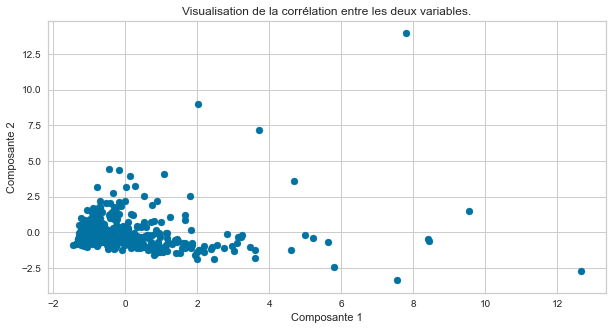

In [58]:
# Visualisation des composantes principales dans un nuage de points

plt.figure(figsize = (10,5))
plt.scatter(output_pca[:,0] , output_pca[:,1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Visualisation de la corrélation entre les deux variables.")
plt.show()

In [70]:
# Coefficient de correlation de pearson entre nos deux variables générées par l'ACP

coeff_corr_1 = pearsonr(output_pca[:,0] , output_pca[:,1])[0] # Coefficient de corrélation presque nul => Aucune corrélation linéaire entre les deux composantes.

### ACP non linéaire

In [63]:
# Récupération des données sauvegardées précedemment

data_acp_non_lineaire = np.load("training_data.npy")

# KPCA avec noyau "rbf"

kpca = KernelPCA(n_components = 2 , kernel = "rbf")

# Entrainement

res_kpca_rbf = kpca.fit_transform(data_acp_non_lineaire)

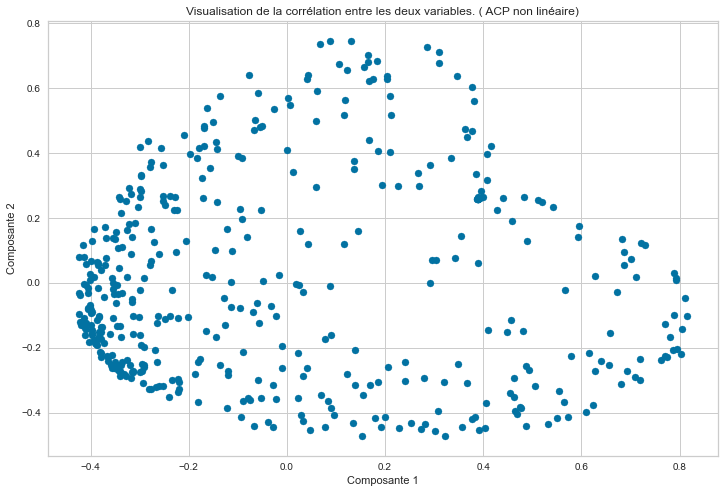

In [67]:
# Visualisation des composantes principales dans un nuage de points

plt.figure(figsize = (12,8))
plt.scatter(res_kpca_rbf[:,0] , res_kpca_rbf[:,1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Visualisation de la corrélation entre les deux variables. ( ACP non linéaire)")
plt.show()

In [71]:
# Coefficient de correlation de pearson entre nos deux variables générées par l'ACP

coeff_corr_2 = kpca_rbf = pearsonr(res_kpca_rbf[:,0] , res_kpca_rbf[:,1])[0]

In [73]:
# Comparaison des coefficients de corrélation

coeff_corr_1 < coeff_corr_2

# Les variables sont plus corrélées dans la méthode d'ACP non linéaire que dans l'ACP linéaire

True

In [75]:
# Ajout des colonnes obtenus avec KPCA dans le tableau initial

data["kpca_rbf_x"] = res_kpca_rbf[:,0]
data["kpca_rbf_Y"] = res_kpca_rbf[:,1]

In [76]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,kpca_rbf_x,kpca_rbf_Y
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279
...,...,...,...,...,...,...,...,...,...,...
435,HoReCa,Other,29703,12051,16027,13135,182,2204,0.376162,0.466779
436,HoReCa,Other,39228,1431,764,4510,93,2346,0.130231,0.745111
437,Retail,Other,14531,15488,30243,437,14841,1867,0.720747,0.122400
438,HoReCa,Other,10290,1981,2232,1038,168,2125,-0.352004,-0.033909


### Clustering K-Means avec la méthode Elbow

In [77]:
# Test de clustering avec 5 clusters

cluster_model = KMeans(n_clusters = 5)

cluster_model.fit(res_kpca_rbf)

clusters = cluster_model.predict(res_kpca_rbf)

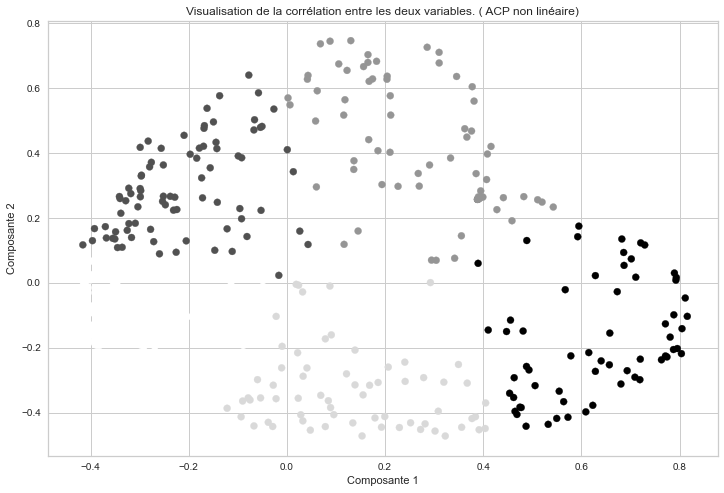

In [81]:
# Visualisation des clusters

plt.figure(figsize = (12,8))
plt.scatter(res_kpca_rbf[:,0] , res_kpca_rbf[:,1] , c = clusters)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Visualisation de la corrélation entre les deux variables. ( ACP non linéaire)")
plt.show()

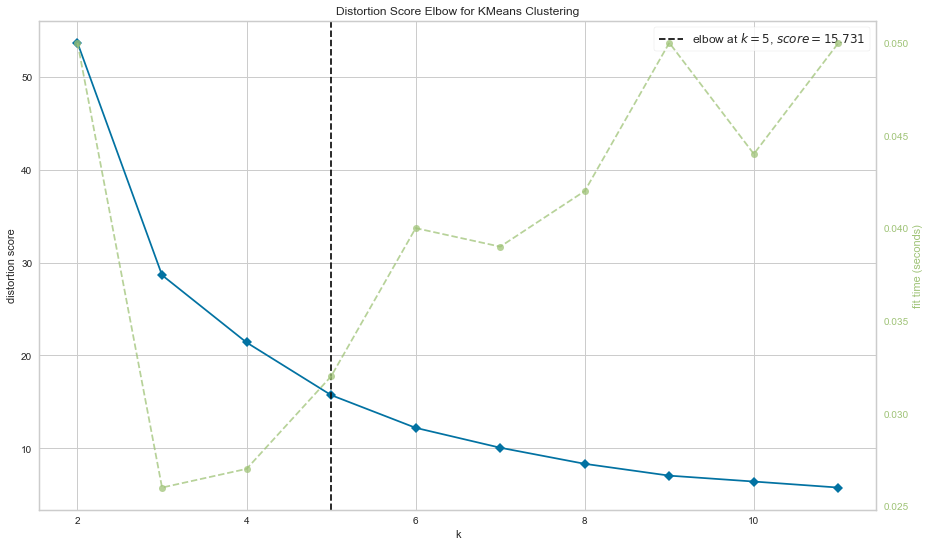

In [84]:
# Méthode Elbow avec yellowbrick ( Extension de scikit-learn)


plt.figure(figsize=(15,9))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans , k=(2,12))
visualizer.fit(res_kpca_rbf)
visualizer.show();

# D'après la visualisation, le bon nombre de clusters pour la segmentation de nos clients est 5.

In [92]:
# Ajout de la colonne contenant les clusters au dataframe et sauvegarde en .csv

data["Cluster"] = clusters
data.to_csv(r'C:\Users\egakosso\Downloads\ALTERYX X POWER BI\Clustering\Segmentation de la clientère avec KMeans et ACP\data_with_clusters.csv' , index = False , sep = "|")

### Analyse des résultats de la segmentation

In [93]:
# Données

Data_clustered = pd.read_csv("data_with_clusters.csv" , sep = "|")

In [95]:
Data_clustered.drop("Clusters" , axis = 1 , inplace = True)

In [97]:
Data_clustered.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,kpca_rbf_x,kpca_rbf_Y,Cluster
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,1
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,1
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,2
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,2


In [100]:
# Centroîdes 

Data_clustered.groupby("Cluster")[features].mean() # Moyenne des champs par cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Cluster,,,,,,
0,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830
1,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308
2,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
3,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481
4,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290


In [109]:
# Réintégration des variables catégorielles(Channel et Region)

segmentation = Data_clustered.groupby(["Cluster","Channel","Region"])[features].mean()

In [110]:
# Exportation pour service marketing

segmentation.to_excel(r"C:\Users\egakosso\Downloads\ALTERYX X POWER BI\Clustering\Segmentation de la clientère avec KMeans et ACP\Segmentation.xlsx" , index = False)

In [111]:
segmentation

Fresh          Milk       Grocery  \
Cluster Channel Region                                             
0       HoReCa  Lisbon   6580.461538   2444.615385   2693.269231   
                Other    6021.242991   2297.859813   2595.775701   
                Porto    7070.600000   1708.266667   4009.933333   
        Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                Other   11887.428571   4446.714286   5953.571429   
                Porto   10708.666667   3779.666667   6193.333333   
1       HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                Other    3332.312500   5690.250000   8992.187500   
        Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                Other    6374.567568   7013.243243  10133.918919   
                Porto    3295.666667   7600.333333   9534.000000   
2       HoReCa  Lisbon  31168.666667   9313.333333   7786.666667   
                Other   34887.564103   6569.153846   5962.948718   
                Porto   16360.000000   8558.500000  10323.500000   
        Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                Other   23057.333333  22303.388889  25736.555556   
                Porto   17490.000000   4241.666667  26943.666667   
3       HoReCa  Lisbon  16912.176471   1504.000000   2178.823529   
                Other   18005.255319   2370.978723   2898.021277   
                Porto   17039.636364   1979.818182   3843.454545   
        Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                Other   17521.500000   4948.500000   6342.500000   
4       HoReCa  Lisbon   2806.000000  10765.000000  15538.000000   
                Other   11908.500000  15602.500000  14858.000000   
        Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                Other    5849.205128  11311.128205  19740.820513   
                Porto    4402.300000  12776.000000  18218.700000   

                              Frozen  Detergents_Paper  Delicatessen  
Cluster Channel Region                                                
0       HoReCa  Lisbon   1858.769231        860.153846    621.769231  
                Other    1663.766355        499.775701    908.700935  
                Porto    1986.000000        444.933333    775.200000  
        Retail  Lisbon   5612.000000        788.000000   1360.000000  
                Other     954.857143       2626.000000    727.571429  
                Porto     898.666667       2860.666667    930.000000  
1       HoReCa  Lisbon   1071.666667       2718.500000    960.000000  
                Other    1080.687500       3090.312500   1139.812500  
        Retail  Lisbon   1662.000000       5195.666667    793.000000  
                Other    1306.621622       4179.351351   1342.108108  
                Porto     699.000000       4894.333333    601.000000  
2       HoReCa  Lisbon   7238.666667        739.444444   2997.555556  
                Other    9338.282051        859.282051   3836.794872  
                Porto   38235.000000        643.500000   3079.500000  
        Retail  Lisbon   5741.000000      19002.000000   3995.500000  
                Other    2316.277778      11587.833333   3950.888889  
                Porto    4351.666667      14181.666667   2280.000000  
3       HoReCa  Lisbon   3719.529412        289.588235   1137.647059  
                Other    4368.574468        514.808511   1026.404255  
                Porto    4963.727273        505.000000   1198.000000  
        Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                Other    2940.250000       1685.500000   1638.250000  
4       HoReCa  Lisbon   1374.000000       5828.000000   2388.000000  
                Other    3388.000000       2680.500000   3507.000000  
        Retail  Lisbon   1435.400000       9015.300000   1827.500000  
                Other    1292.384615       8617.410256   1521.333333  
                Porto    1142.300000       9398.500000   1210.800000